### Step2. CU Framework 데이터 학습 프로그램입니다.

#### 1. Scene Understating 
#### 2. Context Selection 

In [2]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import PIL

import numpy as np
import os

import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import load_model
from keras.preprocessing import image


In [18]:
import datetime
import shutil
    
class CU_Train:
    
    def __init__(self, _model_name , _data_dir):
        
        self.model_name = _model_name
        self.model_saved_name = _model_name + ".h5"
        
        
        self.batch_size = 32 # cj - 8 or 16?
        self.img_size   = 224
        self.img_height = self.img_size
        self.img_width  = self.img_size
        self.data_dir = _data_dir

        pass
    
    def prepare(self):
        
        filePath = self.data_dir + '/.ipynb_checkpoints';
        if os.path.exists(filePath):
            shutil.rmtree(filePath)                
        
        self.train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        self.data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(self.img_height, self.img_width),
        batch_size=self.batch_size)
        
        self.val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        self.data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(self.img_height, self.img_width),
        batch_size=self.batch_size)
        
        self.test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        self.data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(self.img_height, self.img_width),
        batch_size=self.batch_size)
        
        self.class_names = self.train_ds.class_names
        print(self.class_names)

    def sample(self) :
        
        plt.figure(figsize=(10, 10))
        for images, labels in self.train_ds.take(1):
          for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(self.class_names[labels[i]])
            plt.axis("off")

    def eval(self):
        
        self.model.evaluate(self.test_ds)
        
        return True
    
    def get_label_name(self, idx) :        
        return self.class_names[idx]
    
    def infer(self) :

        IMG_SIZE = self.img_size
        TEST_IMG_COUNTS = 20

        batch_holder = np.zeros((TEST_IMG_COUNTS, IMG_SIZE, IMG_SIZE, 3))
        
        loaded_model = tf.keras.models.load_model(self.model_saved_name)
        loaded_model.layers[0].input_shape #(None, 256, 256, 3)
        
        images_dir = []
        
        for fn in self.class_names :
            img_dir= self.data_dir + '/' + fn
            images_dir.append( img_dir )

        for img_dir in images_dir : 

            for i,img in enumerate(os.listdir(img_dir)):

                if i >= TEST_IMG_COUNTS :
                    break

                img = image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
                batch_holder[i, :] = img


            result=loaded_model.predict_classes(batch_holder)

            #print( result )

            fig = plt.figure(figsize=(20, 20))

            for i,img in enumerate(batch_holder):
                fig.add_subplot(4,5, i+1)
                plt.title(self.get_label_name(result[i]))
                plt.imshow(img/256.)

            plt.show()
    

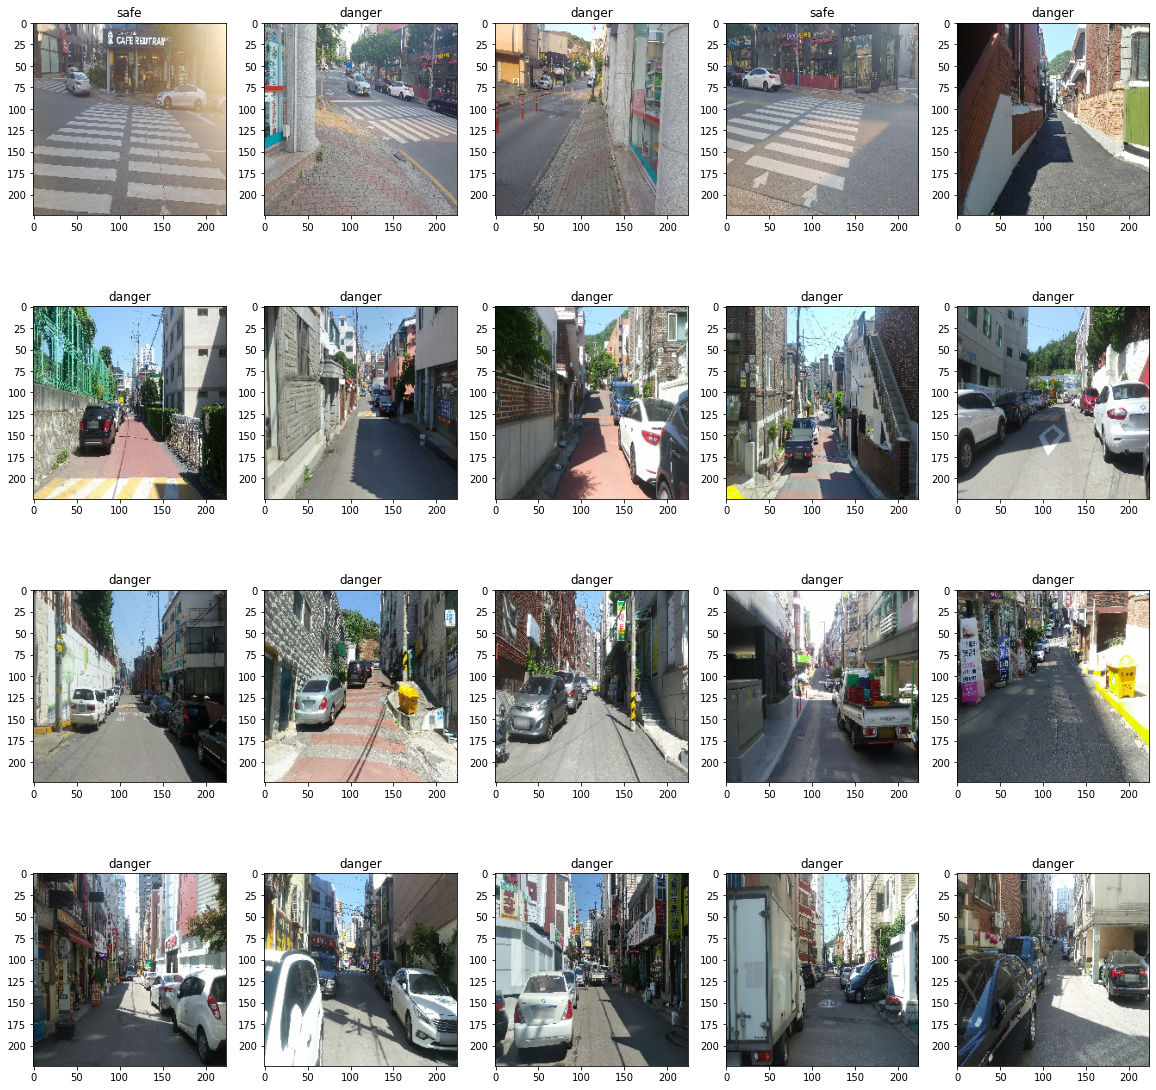

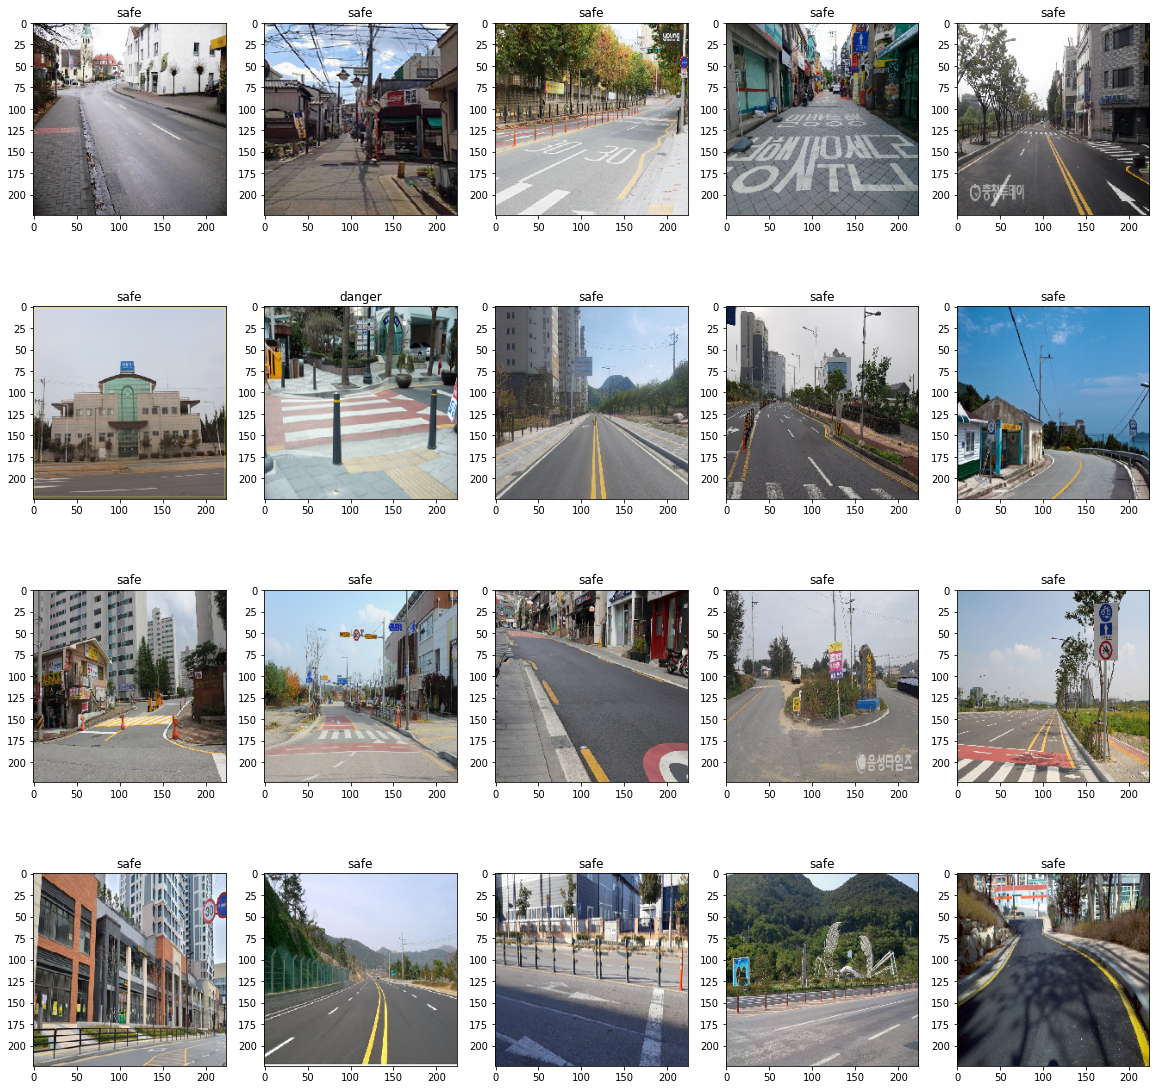

In [12]:
DATASET_PATH = '/home/isu/~~' # 데이터셋 path 입력
test_infer = CU_Train("efficientnetb1", DATASET_PATH_TRIGGERS) # model 이름 입력 ex. resnet, custom_model, efficientnetb1 등
test_infer.class_names = ['park_danger', 'park_safe', 'road_danger', 'road_safe', 'construction_danger', 'construction_safe'] # 데이터셋 종류 그대로 입력 총 6개
test_infer.infer() # 해당 함수로 test

# 단순하게 이미지 읽어서 test (labeling 출력)하는 기능까지 있습니다. 
# 만약 가능하시다면, 정확도를 계산하는 함수를 구현하시면 좋습니다.